<div align="center">
  <img src="img/viz.png"></img>
</div>
<table border="0">
  <tr>
    <td style="width:20%"><pre><b style="font-size:16px">a) 4D complex function</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">b) Mandelbrot set</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">c) Particle trajections in an N-body simulation</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">d) Prime numbers in polar coordinates</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">e) Clifford attractor</b></pre></td>
  </tr>
</table>

# Data visualisation

## Content
1. [Introduction](#introduction)
2. [Motivation](#motivation)
3. [What makes a figure good?](#basics)
4. [What can visualization reveal? $-$ An interesting example](#nr)
    1. [Newton$-$Raphson method for real roots](#nr-real)
    2. [Newton$-$Raphson method for complex roots](#nr-complex)
    3. [What if we use an entire grid of points?](#nr-grid)
    4. [Color the points based on which root is the nearest to them!](#nr-grid-colored-1)
    5. [Color the points of the starting grid based on the colors of the Nth step!](#nr-grid-colored-2)
    6. [Increase the resolution to see the hidden picture](#nr-fractal)
5. [Tips and tricks you may not know](#tips-and-trick)
    1. [Colormaps](#colormaps)
    2. [Use the built-in functions](#built-in)
    3. [Using Google and the docs](#google-and-docs)
6. [Outlook](#outlook)
    1. [Manim](#manim)
    2. [Datashader](#datashader)
    3. [Bokeh/Plotly](#bokeh_plotly)
    4. [Processing](#processing)

In [1]:
%load_ext autoreload
%autoreload 2

## I. Introduction <a name="introduction"></a>

<p style="font-size:16px">
Data visualisation is a broad and vaguely defined topic. Although, for example, students/workers in STEM fields may first think of it in terms of their own discipline, it is not actually specific to any one of them. Data visualisation is used in all fields in all different forms, be it a scientific paper, a presentation at a company or a visualisation of the file structure of a software's source code. The list is endless. Depending on the field of use and the purpose, there are countless software and tools available for "data visualization". There's so much already that even a minor piece of it would be a lengthy process to master.
<br/><br/>
As it goes for anything nowadays, you can't learn everything...
<br/><br/>
Listening to those people who paved the way and selecting the right instruments from the vast arsenal available based on their experience is certainly the smart way to approach here. Yet, mastering the "theory" behind what elevates a visualization from a pretty sad looking doodle to something remarkable is an infinitely more fundamental skill. Software is temporary, but Shrek is forever.
<br/><br/>
The purpose of this entire Notebook would be to provide at least a little extra insight into the rather wide world of visualization. It is also intended to give some extra motivation to get people to learn to make at least a bit more nice-looking diagrams and visualisations than the default settings of basic Python visualisation packages.
</p>

In [ ]:
from intro import *

In [ ]:
intro_figures()

## II. Motivation <a name="motivation"></a>

<p style="font-size:16px">
Okay, but why would you even learn new methods and techniques in the first placeto improve our figures? Why isn't the default settings of e.g. `matplotlib` enough?
<br/><br/>    
Here is an example that compares two visualisations of the same data set of the Betelgeuse light curve. Both images below show the same data series, but I put more effort into one of the images. Can you find which one was that?
</p>

In [ ]:
import pandas as pd
from betelgeuse.data import fetch_data, aggregate_data, filter_data

from betelgeuse.plotter import *

In [ ]:
%%time
jd, mag = fetch_data(1, 5)

In [ ]:
data = aggregate_data(jd, mag)
data = filter_data(data,
                   min_date=pd.Timestamp('2019-01-01'),
                   max_date=pd.Timestamp('2023-10-01'),
                   max_std=1)

In [ ]:
plot_1(data)

In [ ]:
plot_2(data)

### The problem with motivation

<p style="font-size:16px">
In the overwhelming majority of time during your studies, when you have to create a figure for an assignment/homework/lab report/etc., you are not motivated to make something that looks professional or nice even. (At least most people do not have the motivation for something like that.) This is extremely common, this should not sound new or suprising to anyone. However, if you do not start actively focusing on actually making nice figures for required submissions or for anything else, you will be left behind. By the time you get to work on a job or on writing articles, it is already almost too late. It will be painful to catch up in as short period of time as possible, while having to perform in other areas at maximum capacity.
<br/><br/>
Naturally not everyone can do this. This is the reason why we are seeing more and more articles, where the figures are simply ugly and unprofessional. They always show that clearly very little time end effort were invested into their making.
</p>

<div style="text-align: center;">
    <img src="img/bad_1.jpg" style="width: 25%; display: inline-block;">
    <img src="img/bad_2.jpg" style="width: 25%; display: inline-block;">
    <img src="img/bad_3.jpg" style="width: 24%; display: inline-block;">
    <img src="img/bad_4.jpg" style="width: 25%; display: inline-block;">
</div>

### How to even learn visualization?

<p style="font-size:16px">
Míg mindenki számára más és más módszerek válnak be a legkülönfélébb dolgok tanulásához, addig a vizualizáció esetében érdemes észben tartani, hogy ez az egész tulajdonképpen programozás. Ahogy bármilyen programkód megírásakor is az a lényeg, hogy az ember tisztában legyen a rendelkezésére álló eszközökkel, azok használatával és a felmerülő problémák kezelésével és az azokhoz való hozzáállással, úgy a vizualizáció esetében is pontosan ezeket kell szem előtt tartani mind a tanulás, mind a munka során.
<br><br>
A fentieket figyelembe véve, a szép ábrák készítéséhez két általános módszert vethetünk be. Az első, hogy az ember folyamatosan nyitott szemmel jár, ha lát egy cikkben, vagy bárhol az interneten egy tetszetős vizualizációt, akkor megnézi alaposan és megpróbál tanulni belőle. A természettudománynál maradva -- ha már fizikásoknak készül ez az egész -- a cikkekben levő ábrákon megnézhetjük pl, hogy milyen színeket, vagy milyen színgradienst használtak az ábrához (ez talán, ami először feltűnik bárkinek). Utána: milyenek a tengelyfeliratok? Mekkorák a betűk az ábrához képest? Milyen formátumúak a tengelyek mentén található számok? Ha pl. ezek nagyon nagy, vagy nagyon kicsi számok, azok hogyan vannak jelölve? Vannak-e rácsvonalak? Ha igen, milyen színűek, mennyire áttetszőek, milyen vastagok? Szaggatott vonalak-e, vagy simák? És lehetne még tovább sorolni mennyi mindent meg lehet alaposan figyelni bármilyen grafikonon. Minél több ilyet lát az ember, annál jobban fogja tudni ezeket az információkat a saját ábráira is extrapolálni és a megfigyelteket így magától is alkalmazni.
</p>

## III. What makes a figure "good"? <a name="basics"></a>

### Make an impression with depth

In [ ]:
from basics.figure_parts import figure_parts

In [ ]:
%%time
figure_parts()

### Make an impression with variety

In [ ]:
from basics.figure_types import figure_types

In [ ]:
%%time
figure_types(N=20)

#### **Avoid "Chartjunk"**
**Source**: Rougier, N. P., Droettboom, M., & Bourne, P. E. (2014). Ten simple rules for better figures. PLoS computational biology, 10(9), e1003833.

<div style="text-align: center;">
    <img src="img/bad-v-good-1.png" style="width: 100%; display: inline-block;">
</div>


#### **Use variety in a way that does not mislead the reader**
**Source**: Rougier, N. P., Droettboom, M., & Bourne, P. E. (2014). Ten simple rules for better figures. PLoS computational biology, 10(9), e1003833.

<div style="text-align: center;">
    <img src="img/bad-v-good-2.png" style="width: 100%; display: inline-block;">
</div>

## IV. What can visualization reveal? $-$ An interesting example <a name="nr"></a>

In [2]:
from newton.polynomial import Polynomial

### Newton$-$Raphson method for real roots <a name="nr-real"></a>

In [3]:
from newton.demo.real import NR_real

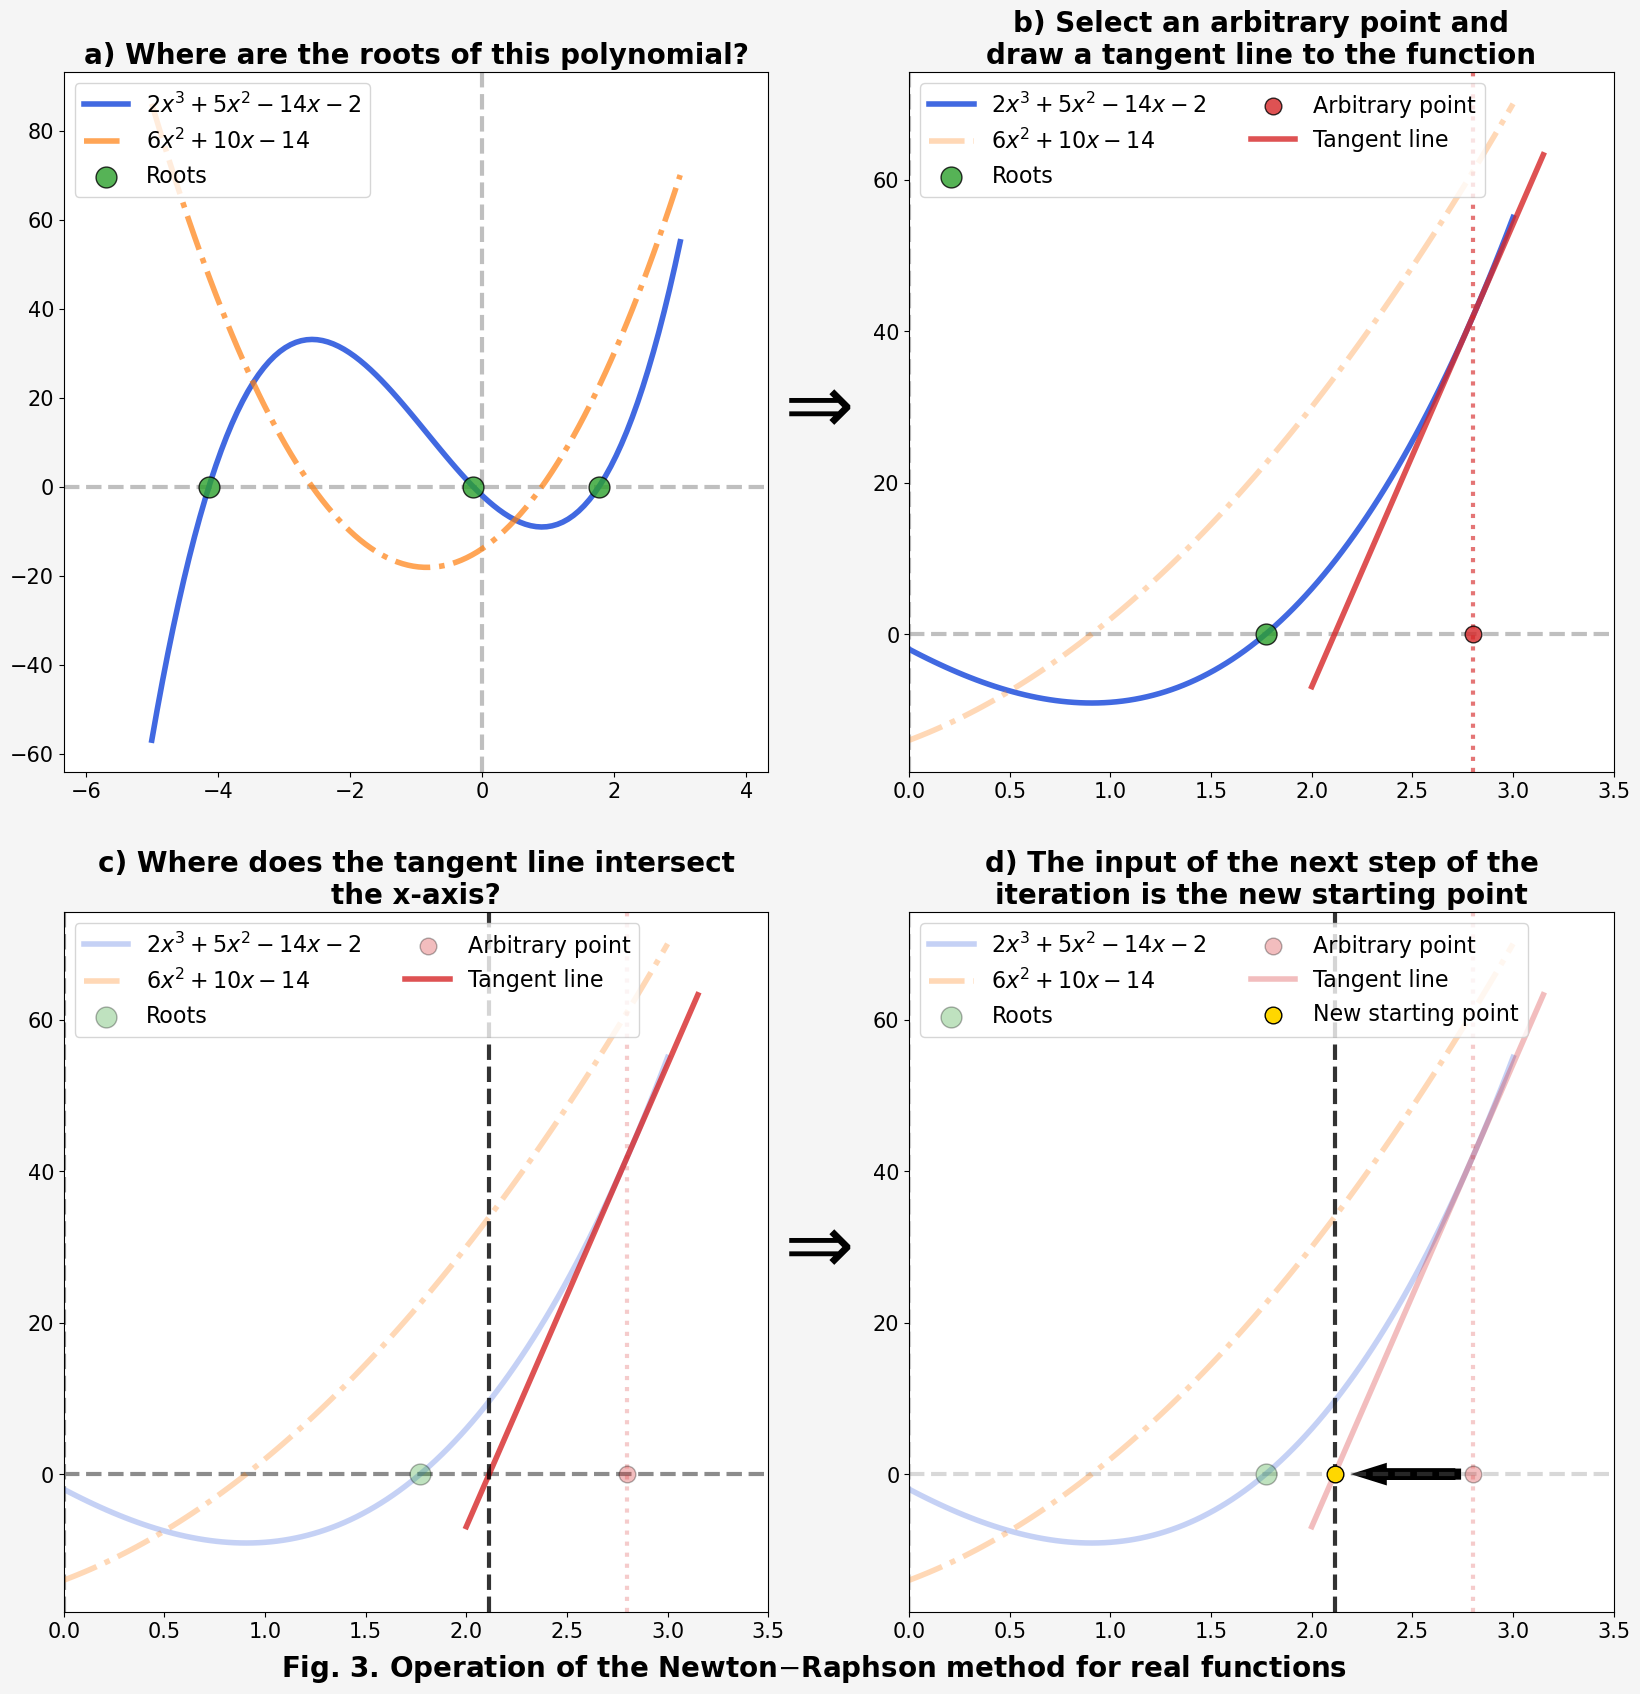

In [4]:
P = Polynomial(c=[2, 5, -14, -2])
NR_real(P)

<p style="font-size:16px">
The above steps are repeated until the intersection of the tangent and the X-axis coincides with one of the roots. It is an iterative process where each next step is determined by the result of the previous one. The location of the new point $x_{n+1}$ obtained in each step can be expressed as follows:
<br>
$$
    x_{n+1}
    =
    x_{n} - \frac{\mathcal{P} \left( x_{n} \right)}{\mathcal{P}\,' \left( x_{n} \right)}
$$
</p>

### Newton$-$Raphson method for complex roots <a name="nr-complex"></a>

In [5]:
from newton.demo.complex import NR_complex_example

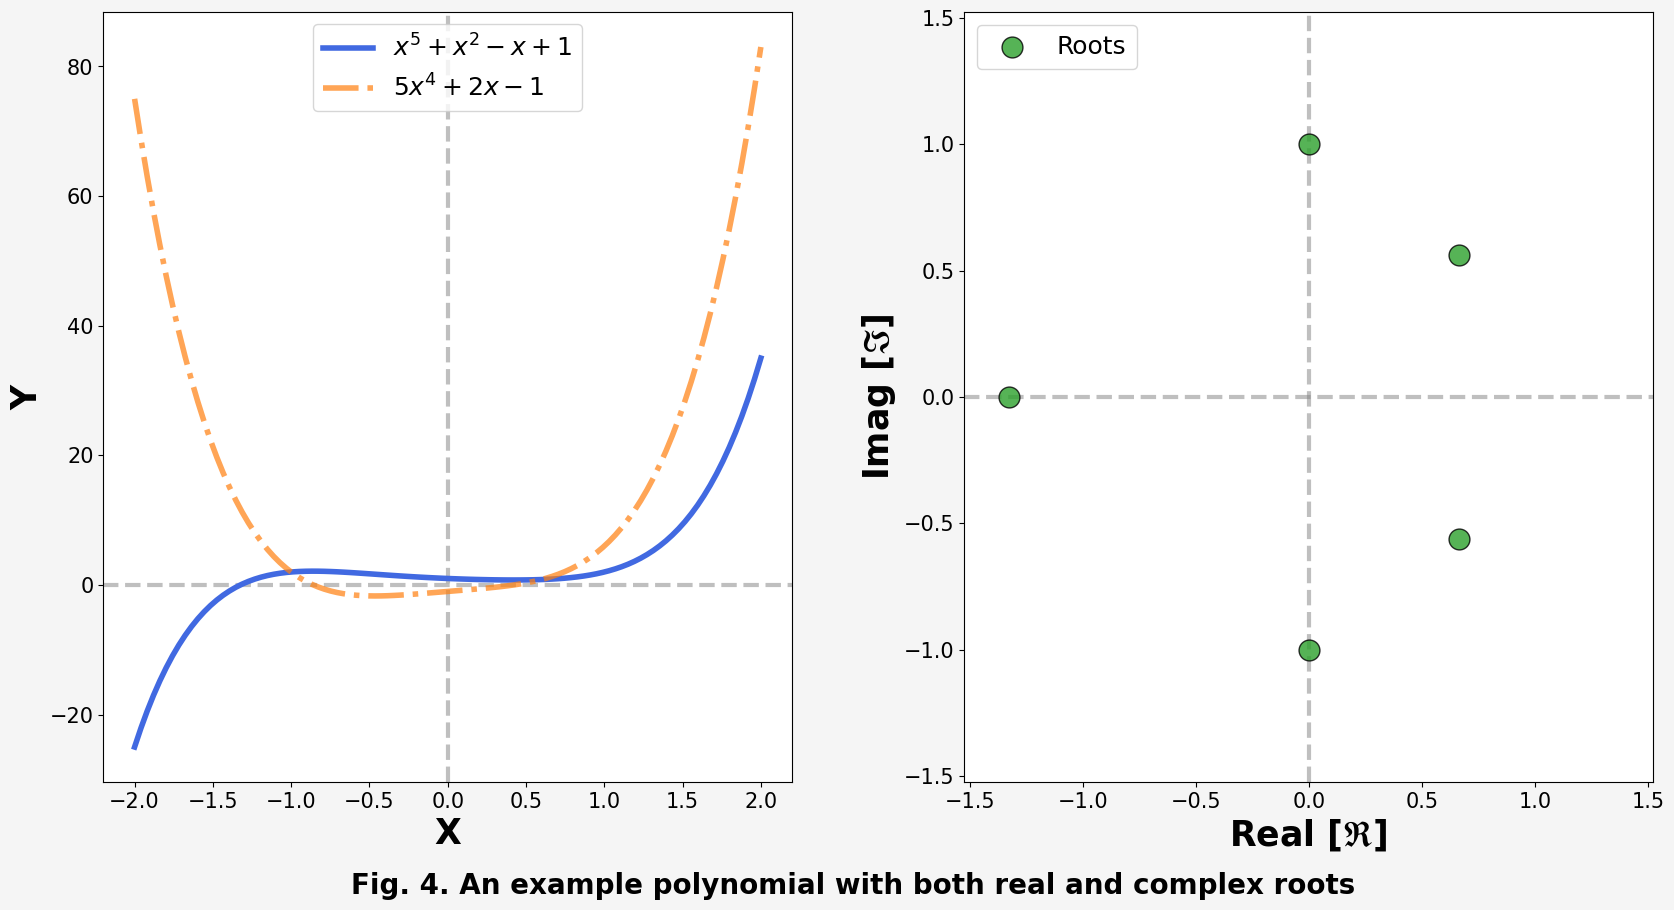

In [6]:
P = Polynomial(c=[1, 0, 0, 1, -1, 1])
grid_lim = None
NR_complex_example(P, grid_lim=grid_lim)

In [ ]:
from newton.demo.complex import NR_complex_method

In [ ]:
NR_complex_method(P, x_0=(0.49+0.56j), grid_lim=grid_lim)

### What if we use an entire grid of points? <a name="nr-grid"></a>

In [ ]:
from newton.fractal import NR_fractal_steps_gray

In [ ]:
N = 64

In [ ]:
%%time
NR_fractal_steps_gray(P, N=N,
                      steps=[1,2,3,4,5],
                      grid_lim=grid_lim)

### Color the points based on which root is the nearest to them! <a name="nr-grid-colored-1"></a>
<p style="font-size:16px">
    To get an idea visually, which point belongs to which root, the grid points are now colored in each iteration. We assign different colors to each root, and then we calculate which point is closest to which root. Each point is then colored with the color of the root closest to it. After completing various numbers of iterations, a colored figure can be created for all of them, which shows both the current position of the original grid points and the closest root to it in the given iteration.
<br><br>
For the coloring, I used one of the colormaps in the <code>seaborn</code> package, which I defined with the following function:
</p>

```python
def get_cmap():  
    return sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
```
<p style="font-size:16px">
Colormaps available in <code>seaborn</code> can be found in the package documentation: <a href="https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-palettes">Seaborn colormaps</a>.
</p>

In [ ]:
from newton.fractal import NR_fractal_steps_colored

In [ ]:
%%time
NR_fractal_steps_colored(P, N=N,
                         steps=[1,2,3,4,5],
                         grid_lim=grid_lim)

### Color the points of the starting grid based on the colors of the Nth step! <a name="nr-grid-colored-2"></a>
<p style="font-size:16px">
    ...
</p>

In [ ]:
from newton.fractal import NR_fractal_steps_reversed

In [ ]:
%%time
NR_fractal_steps_reversed(P, N=N,
                          steps=[1,2,3,4,5],
                          grid_lim=grid_lim)

### Increase the resolution to see the hidden picture <a name="nr-fractal"></a>

<p style="font-size:16px">
    Although some interesting-looking shapes are faintly visible on the colourful grid of points, unfortunately not much detail can be discerned. However, increasing the resolution reveals what we are dealing with...
<br/><br/>
    Using a much finer grid of $256 \times 256$ grid points instead of $64 \times 64$ like above, an intricate pattern emerges that we call the Newton$-$Raphson fractal. As we take more and more steps with the Newton$-$Raphson method, the Newton$-$Raphson fractal becomes more and more detailed on smaller scales, increasing its "depth" on every new step. The true fractal pattern would emerge if and only if we would use an infinitely fine-grained resolution for the grid and take infinite amount of steps with the Newton$-$Raphson method.
</p>

In [ ]:
%%time
NR_fractal_steps_reversed(P, N=256,
                          steps=[1,2,3,4,5],
                          grid_lim=grid_lim)

In [ ]:
from newton.fractal import NR_fractal

In [ ]:
# Possible zooming locations
grid_lims = (
  ((-1.75,1.75),(-1.75,1.75)),
  ((-1.5,1.5),(-1.5,1.5)),
  ((-1.5,0),(-0.75,0.75)),
  ((-1.2,-0.8),(0.0,0.4)),
  ((-1.03,-0.99),(0.13,0.17)),
  ((-1.009290,-1.009265),(0.147300,0.147325))
)

In [ ]:
%%time
gl = grid_lims[0]
NR_fractal(P,
           N=64, n_steps=50, figsize=(10, 10),
           grid_lim_x=gl[0], grid_lim_y=gl[1],
           axis=False, save=False)

In [ ]:
%%time
gl = grid_lims[-1]
NR_fractal(P,
           N=64, n_steps=50, figsize=(10, 10),
           grid_lim_x=gl[0], grid_lim_y=gl[1],
           axis=False, save=False)

<p style="font-size:16px">
If you want to know more why this pattern arises here, watch the following <a href="https://www.youtube.com/@3blue1brown">3b1b</a> videos:
<br>
<ol type="1" style="font-size:16px">
  <li><a href="https://www.youtube.com/watch?v=-RdOwhmqP5s">From Newton’s method to Newton’s fractal (which Newton knew nothing about) </a></li>
  <li><a href="https://www.youtube.com/watch?v=LqbZpur38nw">Beyond the Mandelbrot set, an intro to holomorphic dynamics </a></li>
</ol>
</p>

## V. Tips and tricks you may not know <a name="tips-and-trick"></a>

### Colormaps <a name="colormaps"></a>

#### **Perceptually uniform colormaps (PUCs)**
<p style="font-size:16px"><p style="font-size:16px">
This is the name given to colour gradients in which the human-perceived difference between two arbitrary colours is proportional to the distance between the two colours on the colour wheel, and the luminosity of successive values of the gradient is a monotonically increasing function.
<br/><br/>
Okay, this is not obvious to understand, so see the figure below. On the y-axis the "luminosity" is what the letter "L" in the HSL colour notation denotes. PUCs will demonstrate a linear dependence of luminosity on the color values they consist of.
<br/><br/>
The purpose of using PUCs is to provide a colour gradient that allows us to easily understand the data/quantities they represent, just by looking at them. These colormaps enables us to easily see the difference between two data points and their relative magnitude compared to other data in general.
</p>

In [ ]:
from colormaps import *

In [ ]:
puc_lightness()

#### **Domain coloring $-$ an example use of PUCs**
<div align="center">
  <img src="img/domain.png" width="80%"></img>
</div>

#### **Diverging colormaps**
<p style="font-size:16px">
These colormaps are designed to highlight variations and transitions within datasets, such as temperature changes in a physical system or variations in magnetic field strength and many more. By using contrasting colors that diverge from a neutral midpoint, these colormaps enable us to quickly determine critical thresholds and anomalies in some data set.
</p>

#### **World Development Indicators $-$ Diverging colormaps, Example 1.**
<p style="font-size:16px">
    In this figure, each point represents a country, and the colours of the points represent their distance from the equator in degrees. Here, I have transformed the World Development Indicators data set for every country in the world to some 2-dimensional representation, using the t-SNE dimensionality reduction method. I obtained the six figures by varying one of the main driving parameters ("perplexity") of the t-SNE method. A well-known observation in economics is that closer to the equator, there is, on average, a lower development index. If this is true, we should see a strong indication of it in this low-dimensional representation. 
<br/><br/>
    Although there are some outlier data, the economic observation in question shows up in these figures. We would like to see that points with vibrant colours separate from pale/faint-coloured points. This behaviour is exactly what we can see in these figures. Vibrant-coloured points group together, as well as pale-coloure
</p>

<div align="center">
  <img src="img/diverging_1.png" width="90%"></img>
</div>

#### **Principal Component Analysis $-$ Diverging colormaps, Example 2.**
<p style="font-size:16px">
    Principal Component Analysis (PCA) aims to transform an N-dimensional data set $\mathbf{X}$ into a new basis. The basis vectors of the new basis are determined by the variance of the original data series. The direction of the first basis vector, or so-called "principal component" (PC), is determined by the direction of the largest variance in the data series. All subsequent basis vectors/PCs are orthogonal to this and any previously defined basis vector. Their order is determined by the magnitude of the variance in their directions, starting from largest (1st PC) to smallest (Nth PC).
<br/><br/>
    In reality, the PCs are the eigenvectors of the covariance matrix of the data set $\mathbf{X}$. If the eigenvectors are sorted by descending order based on their respective eigenvalues, we simply get back the PCs in order. The 1st PC has the largest corresponding eigenvalue, while the last PC has the smallest.
<br/><br/>
    Important note that PCs are linear combinations of the original basis vectors. (Same goes for any basis transformation in linear algebra, so it should not be so surprising.)
</p>

In [ ]:
from pca import *

In [ ]:
plot_pca(n_samples=5000, noise=5, pad=0.05)

<p style="font-size:16px">
    In the figure below, you can see the results of my research on the time series of six popular cryptoassets (Popular at the time of the study.) I used PCA as a dimensionality reduction method to reduce the six time series into a 3-dimensional representation. In this figure, I have plotted the value of the scalar coefficients in the linear combination that produces the respective PCs for each cryptocurrency. Suppose we interpret these results in the context of feature selection. In that case, this figure shows how and to what extent a particular cryptocurrency influences the fluctuations in the price of cryptocurrencies in general. In the study, knowing whether this effect is positive (correlation) or negative (anticorrelation) was important. For this reason, it was given to indicated these values with a diverging colormap.
</p>
<div align="center">
  <img src="img/diverging_2.png" width="80%"></img>
</div>

#### **Seaborn colormapek**

<p style="font-size:16px">
    Besides being a specialized Python package built on top of <code>matplotlib</code>, <code>seaborn</code> also allows simple color gradient generation, but you can choose from many predefined and visually pleasing gradients too. Below is an example for arbitrary colormap generation using <code>seaborn</code>.
</p>

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
start = np.random.random(size=5)
rot = np.random.random(size=5)
for s, r in zip(start, rot):
    sign = np.sign(np.random.random()-0.5)
    display(sns.color_palette(f'ch:start={s*sign},rot={r*sign}', as_cmap=True))

### Use the built-in functions <a name="built-in"></a>
<p style="font-size:16px">
Codes that either do not use the built-in features or still use outdated code design are becoming more common. Beginners and professionals and everything in-between, regularly fall into the pitfall of <i>botched code</i> in scientific fields. (Actual sofware engineers are usually the only exception from this, but not entirely.) While most of the times botched code <i>could work</i> and it even produces many successful scientific results for multiple decades now, it is completely <i>useless</i>, because it is impossible to build upon. Which otherwise would be one of fundamental pillars of science... If you can not test nor build upon a theory, an experiment, an instrument or a simulation sofware, then it is simply worthless on the long run.
</p>

#### **Subplots**
<p style="font-size:16px">
Now, it obviously sounds a "bit" harsh, considering the examples below. However, one of the most fundamental rule of thumb of (scientific) coding should be to <b>always write usable code</b>. Even if you only need to worry about subplots...
</p>

```python
# Instead of this...
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# ...use this
fig, ax = plt.subplots(number_of_rows, number_of_columns)
```

<div style="width:80%;margin: auto;">
    <p style="font-size:16px">
        <b>Source</b>:
        <a href="https://twitter.com/abhisheksh_98/status/1256953937766174721">https://twitter.com/abhisheksh_98/status/1256953937766174721</a>
    </p>
    <img src="img/subplots-chart.png"></img>
</div>

#### **Scatterplots**
<p style="font-size:16px">
Another common error, where an archaic method is used to obtain a scatter plot. The <code>matplotlib</code> has a built-in <code>matplotlib.pyplot.scatter()</code> method for many-many years now...
</p>

```python
# Instead of this...
plt.plot(X, Y, marker='o')

# ...use this
plt.scatter(X, Y)
```

### Using Google, AI and the docs <a name="google-and-docs"></a>
<p style="font-size:16px">
    Most of the essential Python packages that people use on a daily basis are pretty well documented. To some extent, visualization packages are also just like this (e.g. <code>matplotlib</code> or <code>seaborn</code>). It is true that there are much better documented packages in general (such as <code>pandas</code> or <code>scikit-learn</code>)... However, the package documentations supplemented with <a href="https://chat.openai.com/">ChatGPT</a> and <a href="https://stackoverflow.com/">StackOverflow</a>, you are armed more than enough to use any package on a professional level.
</p>
<div align="center">
  <img src="img/chatgpt.png" width="90%"></img>
</div>
<br/><br/>
<p style="font-size:16px">
    It's always a good idea to mark code snippets obtained from the Internet in the appropriate place, because it's easy to find where the idea came from and what the exact, original code snippet looked like. Here, for example, is the code I used to create the colorbar for my t-SNE diagram above, shown on the right-hand side of the figure:
</p>
<div align="center">
  <img src="img/stackoverflow.png" width="90%"></img>
</div>
<br/><br/>
<p style="font-size:16px">
    Even developers of official packages rely on and cite StackOverflow. More specifically the rely on it heavily, and sometimes even cite it officially:
</p>
<div align="center">
  <img src="img/stackoverflow-matplotlib.png" width="90%"></img>
</div>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Click inside the parenthesis and click shift + tab
fig, axes = plt.subplots();

## 6. Outlook <a name="outlook"></a>

### Manim <a name="manim"></a>

<p style="font-size:16px">
Grant Sanderson (3b1b) kezdeményezéseként indult, ma már nagy fejlesztő community-val rendelkező csomag, aminek a célja, hogy matematikai, magyarázó vizualizációkat készítsünk nagyon egyszerűen, rengeteg beépített függvénnyel. Ez tényleg egy animációkat készítő csomag, <a href="https://3b1b.github.io/manim/getting_started/example_scenes.html">szóval érdemes animációkat nézni róla</a>.
</p>

### Datashader <a name="datashader"></a>
<p style="font-size:16px">
Ha nagyon sok adatpontunk van (akár több milliárd), akkor azokat nem tudjuk egyesével mind ábrázolni, főleg nem akkor, ha ezek pl. 3 dimenziósak. Ahhoz, hogy ezt áthidaljuk, szokás maguk az adatpontok helyett azok "sűrűségét", vagy "projektált sűrűségét" ábrázolni. A "projektált sűrűség" annyit takar, hogy ha egy kiválasztott irányból nézzük a 3D-s adatokat, akkor nagyon sok olyan pont lesz, amik egymással átfednek, de helyenként ritkásabb, vagy teljesen üres foltok is vannak. Ezt, mint "sűrűség" ábrázolva, ahol a nagyobb sűrűség a sok, míg a kisebb a kevés egymást átfedő pontot ábrázolja, megkapunk egy lehetséges, "projektált sűrűséget" mutató ábrát.
<br><br>
Ilyet tud a <code>matplotlib</code> is, de nagyon nem optimalizált a kódja és szörnyen lassú. Cserébe van egy külön csomag csak erre (és pár más dologra is), aminek <code>datashader</code> a neve. <a href="https://www.easyzoom.com/imageaccess/65cd4f4e19ef4565b13f0f8b9e76c5ca">Itt egy példa</a> egy ilyen vizualizációról, amit <code>datashader</code>rel készítettem. Az ábrán a Gaia DR2-ben található 1.6 milliárd csillag pozícióját ábrázoltam.
</p>

### Bokeh/Plotly <a name="bokeh_plotly"></a>
<p style="font-size:16px">
    Coming soon...
</p>

### Processing <a name="processing"></a>

<p style="font-size:16px">
    Coming soon...
</p>